<a href="https://colab.research.google.com/github/KarlaMichelleSorianoSanhez/EDP-1/blob/main/Ecuaciones_diferenciales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Subtema 2.2. El comando `dsolve` en SymPy (Python)

El comando `dsolve()` es la herramienta principal de **SymPy** para resolver ecuaciones diferenciales ordinarias de forma simbólica.

**Sintaxis general:**
```python
dsolve(eq, func=None, hint='default', simplify=True, ics=None,
       xi=None, eta=None, x0=0, n=6, **kwargs)


**Descripción de los parámetros:**

- `eq`: la ecuación diferencial a resolver, puede ser una igualdad `Eq()` o una expresión igualada a cero.
- `func`: la función incógnita (por ejemplo, `y(t)`), normalmente se detecta automáticamente.
- `hint`: sugiere un método específico para resolver la EDO (por ejemplo, 'separable', 'Bernoulli').
- `classify_ode(eq)` permite conocer todos los métodos posibles (`hints`) disponibles.
- `simplify`: aplica simplificaciones simbólicas al resultado (por defecto es `True`).
- `ics`: condiciones iniciales en forma de diccionario, por ejemplo `{y(0): 1, y'(0): 0}`.
- `xi`, `eta`: funciones infinitesimales usadas en métodos de simetría de Lie (generalmente no se usan en cursos básicos).
- `x0`: punto alrededor del cual se centra la solución en serie.
- `n`: número de términos en una solución en serie de potencias.

Este comando es muy flexible y permite resolver una amplia variedad de ecuaciones diferenciales, tanto con solución cerrada como en forma de series.

A continuación, mostramos un ejemplo básico de uso.

In [2]:

import sympy as sp
from sympy import Function, symbols, Eq, Derivative, dsolve

# Definir variable y función
t = symbols('t')
y = Function('y')

# Definir una EDO sencilla: y'' - y = 0
edo = Eq(Derivative(y(t), t, t) - y(t), 0)

# Resolver la EDO con dsolve
sol = dsolve(edo, y(t))

# Mostrar la solución
sp.pprint(sol)

           -t       t
y(t) = C₁⋅ℯ   + C₂⋅ℯ 


###Subtema 3. Ejemplo 1: Ecuación Logística
La ecuación logística modela el crecimiento de una población `p(t)` considerando un límite natural o "capacidad de carga". Su forma general es:

$
\frac{dp}{dt} = ap - bp^2, \quad p(0) = p_0$

donde:
- `a` es la tasa de crecimiento,
- `b` representa el efecto limitante (competencia),
- `p₀` es la población inicial.

Usaremos `SymPy` para:
1. Definir la ecuación diferencial y resolverla simbólicamente con `dsolve`,
2. Sustituir valores de parámetros con `subs`,
3. Graficar las soluciones para distintos valores iniciales usando `matplotlib`.

Este ejemplo también permite aplicar funciones auxiliares como `lambdify`, para convertir expresiones simbólicas en funciones evaluables numéricamente.

In [3]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Function, Eq, Derivative, dsolve, lambdify

# Definir variables simbólicas
t = sp.symbols('t')
p = sp.Function('p')
a, b, p0 = sp.symbols('a b p0')

# Definir la ecuación logística
ode = sp.Eq(Derivative(p(t), t), a*p(t) - b*p(t)**2)

# Resolver la EDO con condición inicial
sol = dsolve(ode, p(t), ics={p(0): p0})

# Mostrar solución simbólica
sp.pprint(sol)

               ⎛       ⎛  b⋅p₀   ⎞⎞   
               ⎜    log⎜─────────⎟⎟   
               ⎜       ⎝-a + b⋅p₀⎠⎟   
             a⋅⎜t + ──────────────⎟   
               ⎝          a       ⎠   
          a⋅ℯ                         
p(t) = ───────────────────────────────
         ⎛   ⎛       ⎛  b⋅p₀   ⎞⎞    ⎞
         ⎜   ⎜    log⎜─────────⎟⎟    ⎟
         ⎜   ⎜       ⎝-a + b⋅p₀⎠⎟    ⎟
         ⎜ a⋅⎜t + ──────────────⎟    ⎟
         ⎜   ⎝          a       ⎠    ⎟
       b⋅⎝ℯ                       - 1⎠


A continuación, sustituimos valores específicos para los parámetros `a`, `b` y condiciones iniciales `p₀ = 5, 6, 7` y graficamos las soluciones en el intervalo `t ∈ [0, 200]`.

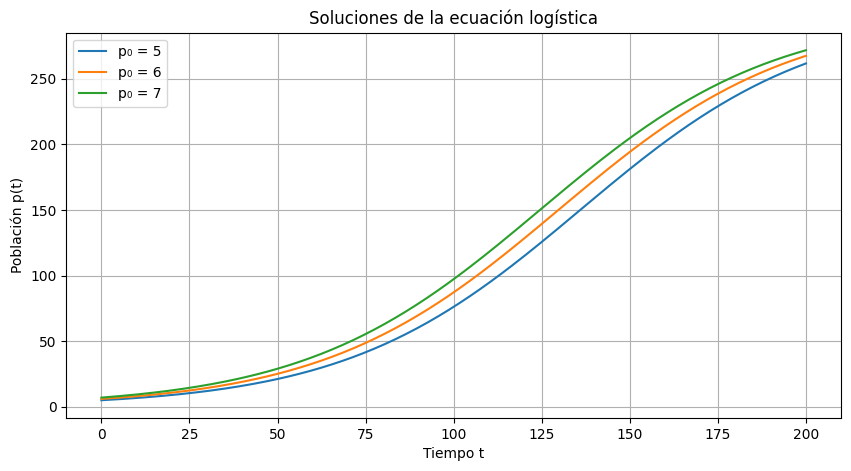

In [4]:
# Sustituir valores de parámetros
valores1 = {a: 0.03, b: 0.0001, p0: 5}
valores2 = {a: 0.03, b: 0.0001, p0: 6}
valores3 = {a: 0.03, b: 0.0001, p0: 7}

# Sustituir en la solución
sol1 = sol.subs(valores1)
sol2 = sol.subs(valores2)
sol3 = sol.subs(valores3)

# Crear funciones numéricas con lambdify
func1 = lambdify(t, sol1.rhs, 'numpy')
func2 = lambdify(t, sol2.rhs, 'numpy')
func3 = lambdify(t, sol3.rhs, 'numpy')

# Generar datos y graficar
tt = np.linspace(0, 200, 200)
pp1 = func1(tt)
pp2 = func2(tt)
pp3 = func3(tt)

plt.figure(figsize=(10,5))
plt.plot(tt, pp1, label='p₀ = 5')
plt.plot(tt, pp2, label='p₀ = 6')
plt.plot(tt, pp3, label='p₀ = 7')
plt.xlabel('Tiempo t')
plt.ylabel('Población p(t)')
plt.title('Soluciones de la ecuación logística')
plt.grid(True)
plt.legend()
plt.show()

### Subtema 7. Sistema masa-resorte

Este modelo describe el movimiento de una masa unida a un resorte cuya fuerza de restitución disminuye con el tiempo. Este comportamiento se representa con un término exponencial en la constante del resorte. La ecuación diferencial que modela este sistema es:

$m y''(t) + k e^{-\alpha t} y(t) = 0$

donde:
- `m` es la masa del cuerpo,
- `k` es la constante del resorte,
- `α` es el coeficiente de decaimiento,
- `y(t)` es la posición de la masa con respecto al tiempo.


En este caso, la constante del resorte `k` se ve afectada por un término exponencial que depende del tiempo `t`. Esto puede interpretarse como un resorte que pierde rigidez (o fuerza de restitución) con el paso del tiempo.

Se trata de una ecuación diferencial **lineal, homogénea y de segundo orden con coeficientes variables**.

Esta ecuación se puede resolver simbólicamente en Python usando la librería **SymPy** y el comando `dsolve()`. El resultado se presenta como una **serie de potencias**, lo cual es común cuando los coeficientes dependen del tiempo y no se dispone de una solución cerrada con funciones elementales.Es  decir como la solución no puede expresarse con funciones elementales, SymPy devuelve una **serie de potencias** centrada en `t = 0`.

In [ ]:
# Resolución del sistema masa-resorte en SymPy
from sympy import *
import sympy as sp

#Definición de variables simbolicas y función

t = sp.symbols('t')
y = sp.Function('y')
m = sp.symbols('m')
k = sp.symbols('k')
a = sp.symbols('a')

# Definición de la ecuación diferencial
ode7 = sp.Eq(m*sp.Derivative(y(t), t, t) + k*sp.exp(-a*t)*y(t), 0)

# Solución simbólica en serie de potencias
sol7 = sp.dsolve(ode7, y(t))

# Mostrar la solución
sp.pprint(sol7)

          ⎛ 2  4  -2⋅a⋅t      2  -a⋅t    ⎞        ⎛     2  -a⋅t    ⎞        
          ⎜k ⋅t ⋅ℯ         k⋅t ⋅ℯ        ⎟        ⎜  k⋅t ⋅ℯ        ⎟    ⎛ 6⎞
y(t) = C₂⋅⎜───────────── - ────────── + 1⎟ + C₁⋅t⋅⎜- ────────── + 1⎟ + O⎝t ⎠
          ⎜        2          2⋅m        ⎟        ⎝     6⋅m        ⎠        
          ⎝    24⋅m                      ⎠                                  


### Subtema 9. Ecuación de Airy

La ecuación diferencial que se estudia es:

$y''(t) - t y(t) = 0$

SymPy puede resolver esta ecuación de dos formas:

1. **Solución general**, en términos de funciones especiales de Airy: `airyai(t)` y `airybi(t)`.
2. **Solución en serie de potencias**, centrada en un punto como `t = 0` o `t = 1`, útil para aproximaciones o gráficas.

A continuación se muestra cómo se implementa esto en Python usando SymPy.

In [ ]:
import sympy as sp

t = sp.symbols('t')
y = sp.Function('y')

# Definimos la ecuación de Airy
ode9 = sp.Eq(sp.Derivative(y(t), t, t) - t*y(t), 0)

# Solución general (con funciones de Airy)
sol9 = sp.dsolve(ode9, y(t))
sp.pprint(sol9)

y(t) = C₁⋅Ai(t) + C₂⋅Bi(t)


Obtenemos así una solución que incluye funciones de Airy:

$y(t) = C_1 \cdot \text{airyai}(t) + C_2 \cdot \text{airybi}(t)$

Para obtener una **solución en serie de potencias centrada en cero**, usamos `hint='2nd_power_series_ordinary'` y condiciones iniciales:


$y(0) = 1, \quad y'(0) = 0$

In [ ]:
# Solución en serie centrada en cero
sols9 = dsolve(ode9, hint='2nd_power_series_ordinary')

# Condiciones iniciales: y(0) = 1, y′(0) = 0
constants = solve([
    sols9.rhs.subs(t, 0) - 1,
    sols9.rhs.diff(t).subs(t, 0)
], dict=True)[0]

# Sustitución y expansión
ysol = expand(sols9.rhs.subs(constants))
pprint(ysol.series(t, 0, 6))

     3        
    t     ⎛ 6⎞
1 + ── + O⎝t ⎠
    6         


Y así obtenemos la serie centrada en 0:

$1 + t + \frac{t^3}{6} + \frac{t^4}{12} + \mathcal{O}(t^6)$

También se puede obtener una **serie centrada en t = 1**, con condiciones:

$y(1) = 1, \quad y'(1) = 1$

In [ ]:
# Serie centrada en t = 1 a partir de la solución general
s9 = simplify(series(sol9.rhs, t, 1))
ds9 = diff(s9, t)

# Condiciones: y(1) = 1, y′(1) = 1
constants = solve([
    s9.subs(t, 1) - 1,
    ds9.subs(t, 1) - 1
], dict=True)[0]

# Sustitución y expansión
ss9 = s9.subs(constants)
pprint(simplify(series(ss9, t, 1, 6)))

       2               3                                 3                                 4       ↪
(t - 1)         (t - 1) ⋅Ai'(1)⋅Bi(1)             (t - 1) ⋅Ai(1)⋅Bi'(1)             (t - 1) ⋅Ai'(1 ↪
──────── + ─────────────────────────────── - ─────────────────────────────── + ─────────────────── ↪
   2       3⋅Ai'(1)⋅Bi(1) - 3⋅Ai(1)⋅Bi'(1)   3⋅Ai'(1)⋅Bi(1) - 3⋅Ai(1)⋅Bi'(1)   8⋅Ai'(1)⋅Bi(1) - 8⋅ ↪

↪                            4                                  5                                  ↪
↪ )⋅Bi(1)             (t - 1) ⋅Ai(1)⋅Bi'(1)              (t - 1) ⋅Ai'(1)⋅Bi(1)               (t -  ↪
↪ ──────────── - ─────────────────────────────── + ───────────────────────────────── - ─────────── ↪
↪ Ai(1)⋅Bi'(1)   8⋅Ai'(1)⋅Bi(1) - 8⋅Ai(1)⋅Bi'(1)   24⋅Ai'(1)⋅Bi(1) - 24⋅Ai(1)⋅Bi'(1)   24⋅Ai'(1)⋅B ↪

↪   5                                                                                              ↪
↪ 1) ⋅Ai(1)⋅Bi'(1)               t⋅Ai'(1)⋅Bi(1)                t⋅Ai(1)⋅Bi'(1)           ⎛

Y así obtenemos la serie centrada en 1:

$(t - 1)^2/2 + (t - 1)^3/3 + (t - 1)^4/8 + (t - 1)^5/24 + \dots$

más términos con productos de las funciones `airyai`, `airybi`, y sus derivadas evaluadas en `t = 1`.

#### Gráfica de las soluciones con diferentes condiciones iniciales

Resolvemos la ecuación de Airy con dos conjuntos distintos de condiciones iniciales:

- Solución \( y_1(t) \): \( y_1(0) = 0 \), \( y_1'(0) = 1 \)
- Solución \( y_2(t) \): \( y_2(0) = 1 \), \( y_2'(0) = 0 \)

Estas soluciones nos permiten observar el comportamiento del sistema tanto para valores negativos como positivos de \( t \). Usamos `lambdify` para graficarlas.

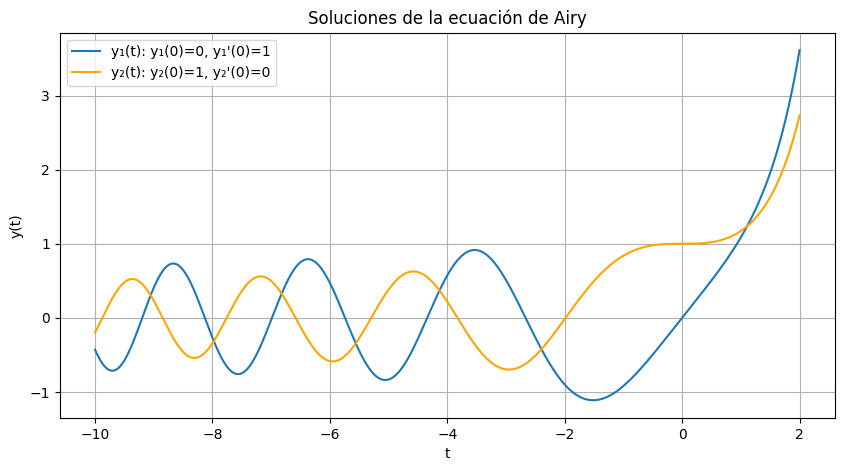

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Derivative, lambdify, dsolve

# Resolver y₁: y₁(0) = 0, y₁′(0) = 1
sol_y1 = dsolve(ode9, y(t), ics={y(0): 0, Derivative(y(t), t).subs(t, 0): 1})
y1_func = lambdify(t, sol_y1.rhs, modules='scipy')  # <--- AQUÍ EL CAMBIO

# Resolver y₂: y₂(0) = 1, y₂′(0) = 0
sol_y2 = dsolve(ode9, y(t), ics={y(0): 1, Derivative(y(t), t).subs(t, 0): 0})
y2_func = lambdify(t, sol_y2.rhs, modules='scipy')  # <--- AQUÍ TAMBIÉN

# Intervalo de tiempo
tt = np.linspace(-10, 2, 500)

# Evaluar funciones
y1_vals = y1_func(tt)
y2_vals = y2_func(tt)

# Graficar
plt.figure(figsize=(10, 5))
plt.plot(tt, y1_vals, label="y₁(t): y₁(0)=0, y₁'(0)=1")
plt.plot(tt, y2_vals, label="y₂(t): y₂(0)=1, y₂'(0)=0", color='orange')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Soluciones de la ecuación de Airy')
plt.grid(True)
plt.legend()
plt.show()

### Subtema 10. Campo de direcciones de una ecuación diferencial

La ecuación diferencial que se analiza es:

$
x'(t) = e^{-t} - 2x(t)$

El **campo de direcciones** representa gráficamente la pendiente de las soluciones en cada punto del plano. Nos ayuda a entender visualmente el comportamiento de las soluciones sin necesidad de resolver la EDO.

Para generar esta gráfica en Python se utilizan `NumPy` para crear la malla, y `Matplotlib` para mostrar las flechas del campo vectorial con `quiver`.

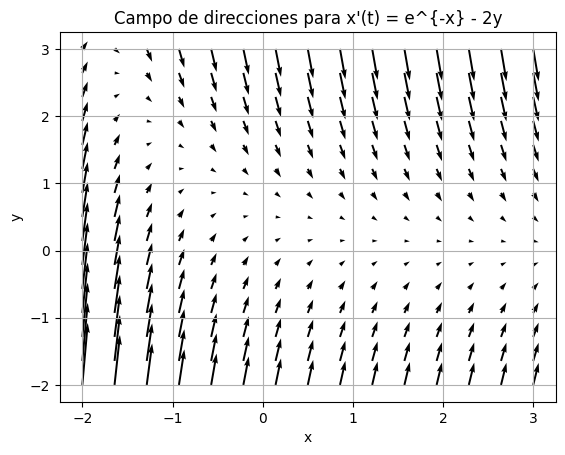

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Crear malla (grid) de puntos en el plano (x, y)
x, y = np.meshgrid(np.linspace(-2, 3, 15), np.linspace(-2, 3, 15))

# Definir la pendiente: x'(t) = exp(-x) - 2*y
u = 1  # eje horizontal constante (t no varía en campo de direcciones)
v = np.exp(-x) - 2*y  # derivada dx/dt

# Graficar el campo de direcciones
plt.quiver(x, y, u, v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Campo de direcciones para x\'(t) = e^{-x} - 2y')
plt.grid(True)
plt.axis('tight')
plt.show()